In [13]:
import os
import pandas as pd

path_Data = "./Stock Market"

AAPL = pd.read_csv(path_Data + "/AAPL.csv")
GOOG = pd.read_csv(path_Data + "/GOOG.csv")
MSFT = pd.read_csv(path_Data + "/MSFT.csv")

In [14]:
print(AAPL.head())

         Date       High        Low       Open      Close     Volume  \
0  12/30/2019  73.172501  71.305000  72.364998  72.879997  144114400   
1  12/31/2019  73.419998  72.379997  72.482498  73.412498  100805600   
2    1/2/2020  75.150002  73.797501  74.059998  75.087502  135480400   
3    1/3/2020  75.144997  74.125000  74.287498  74.357498  146322800   
4    1/6/2020  74.989998  73.187500  73.447502  74.949997  118387200   

   Adj Close  
0  72.255997  
1  72.783936  
2  74.444603  
3  73.720840  
4  74.308266  


In [15]:
display(AAPL)

,Date,High,Low,Open,Close,Volume,Adj Close
0,12/30/2019,73.172501,71.305000,72.364998,72.879997,144114400,72.255997
1,12/31/2019,73.419998,72.379997,72.482498,73.412498,100805600,72.783936
2,1/2/2020,75.150002,73.797501,74.059998,75.087502,135480400,74.444603
3,1/3/2020,75.144997,74.125000,74.287498,74.357498,146322800,73.720840
4,1/6/2020,74.989998,73.187500,73.447502,74.949997,118387200,74.308266
...,...,...,...,...,...,...,...
247,12/21/2020,128.309998,123.449997,125.019997,128.229996,121251600,128.229996
248,12/22/2020,134.410004,129.649994,131.610001,131.880005,168904800,131.880005
249,12/23/2020,132.429993,130.779999,132.160004,130.960007,88223700,130.960007
250,12/24/2020,133.460007,131.100006,131.320007,131.970001,54930100,131.970001


In [16]:
AAPL["Adj Close"] = AAPL["Adj Close"].round(decimals=3)
AAPL.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,12/30/2019,73.172501,71.305000,72.364998,72.879997,144114400,72.256
1,12/31/2019,73.419998,72.379997,72.482498,73.412498,100805600,72.784
2,1/2/2020,75.150002,73.797501,74.059998,75.087502,135480400,74.445
3,1/3/2020,75.144997,74.125000,74.287498,74.357498,146322800,73.721
4,1/6/2020,74.989998,73.187500,73.447502,74.949997,118387200,74.308


In [17]:
import plotly.subplots as ms
import plotly.graph_objects as go

fig = ms.make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.02)

fig.add_trace(
    go.Candlestick(
        x=AAPL.index,
        open=AAPL["Open"],
        high=AAPL["High"],
        low=AAPL["Low"],
        close=AAPL["Close"],
        name="Candlestick",
    ),
    row=1,
    col=1,
)

# Thêm biểu đồ cột thể hiện khối lượng giao dịch
fig.add_trace(go.Bar(x=AAPL.Date, y=AAPL["Volume"], name="Volume"), row=2, col=1)

# Cập nhật bố cục của biểu đồ, bao gồm tiêu đề, tiêu đề trục y, ẩn thanh trượt x, khoảng cách giữa các cột, và đặt phạm vi thời gian cho trục x.
fig.update_layout(
    title="CandleStick Chart",
    yaxis_title="AAPL",
    xaxis_rangeslider_visible=False,
    bargap=0.1,
    # xaxis_range=["12/30/2019", "12/24/2020"],
)

In [18]:
import statistics

adjValues = AAPL["Adj Close"].values
mean_value = statistics.mean(adjValues)
median_value = statistics.median(adjValues)
std_value = statistics.stdev(adjValues)
print(f"mean_value:{mean_value}, median_value:{median_value}, std_value:{std_value}")

mean_value:94.4041626984127, median_value:90.793, std_value:21.67056920384977


<Axes: >

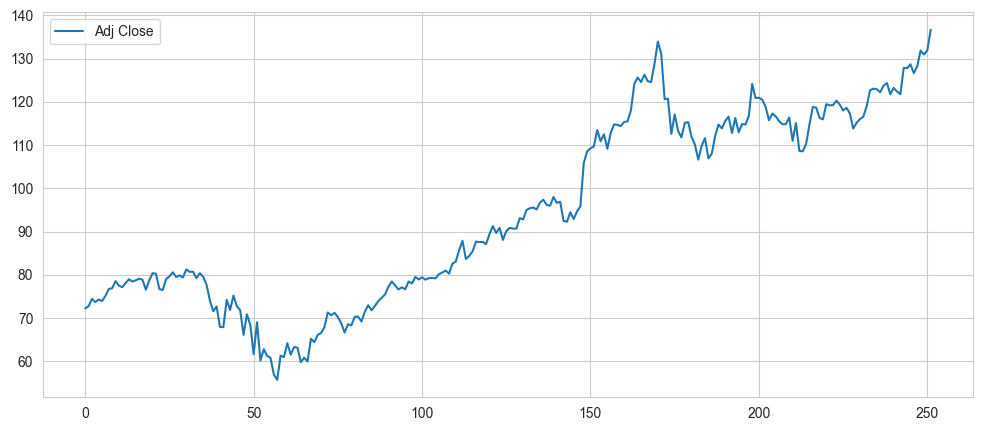

In [19]:
import seaborn as sns

sns.set_style("whitegrid")

AAPL["Adj Close"].plot(legend=True, figsize=(12, 5))

In [20]:
moving_averages = [10, 20, 50]  # List of moving average windows
for ma in moving_averages:
    column_name = f"MA {ma} days"  # Use f-strings for clarity and efficiency
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma, center=False).mean()
    
AAPL.head(55)

,Date,High,Low,Open,Close,Volume,Adj Close,MA 10 days,MA 20 days,MA 50 days
0,12/30/2019,73.172501,71.305000,72.364998,72.879997,144114400,72.256,NaN,NaN,NaN
1,12/31/2019,73.419998,72.379997,72.482498,73.412498,100805600,72.784,NaN,NaN,NaN
2,1/2/2020,75.150002,73.797501,74.059998,75.087502,135480400,74.445,NaN,NaN,NaN
3,1/3/2020,75.144997,74.125000,74.287498,74.357498,146322800,73.721,NaN,NaN,NaN
4,1/6/2020,74.989998,73.187500,73.447502,74.949997,118387200,74.308,NaN,NaN,NaN
5,1/7/2020,75.224998,74.370003,74.959999,74.597504,108872000,73.959,NaN,NaN,NaN
6,1/8/2020,76.110001,74.290001,74.290001,75.797501,132079200,75.149,NaN,NaN,NaN
7,1/9/2020,77.607498,76.550003,76.809998,77.407501,170108400,76.745,NaN,NaN,NaN
8,1/10/2020,78.167503,77.062500,77.650002,77.582497,140644800,76.918,NaN,NaN,NaN
9,1/13/2020,79.267502,77.787498,77.910004,79.239998,121532000,78.562,74.8847,NaN,NaN


<Axes: >

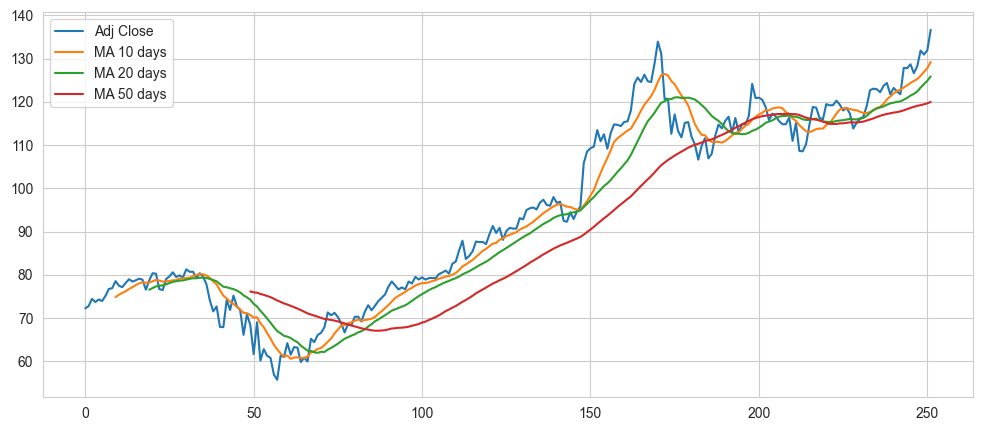

In [21]:
AAPL[['Adj Close','MA 10 days','MA 20 days','MA 50 days']].plot(figsize=(12,5))

In [22]:
#In order calculate daily return we can use the percentage change of the adjusted closing price
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL.head()

,Date,High,Low,Open,Close,Volume,Adj Close,MA 10 days,MA 20 days,MA 50 days,Daily Return
0,12/30/2019,73.172501,71.305000,72.364998,72.879997,144114400,72.256,NaN,NaN,NaN,NaN
1,12/31/2019,73.419998,72.379997,72.482498,73.412498,100805600,72.784,NaN,NaN,NaN,0.007307
2,1/2/2020,75.150002,73.797501,74.059998,75.087502,135480400,74.445,NaN,NaN,NaN,0.022821
3,1/3/2020,75.144997,74.125000,74.287498,74.357498,146322800,73.721,NaN,NaN,NaN,-0.009725
4,1/6/2020,74.989998,73.187500,73.447502,74.949997,118387200,74.308,NaN,NaN,NaN,0.007962


<Axes: >

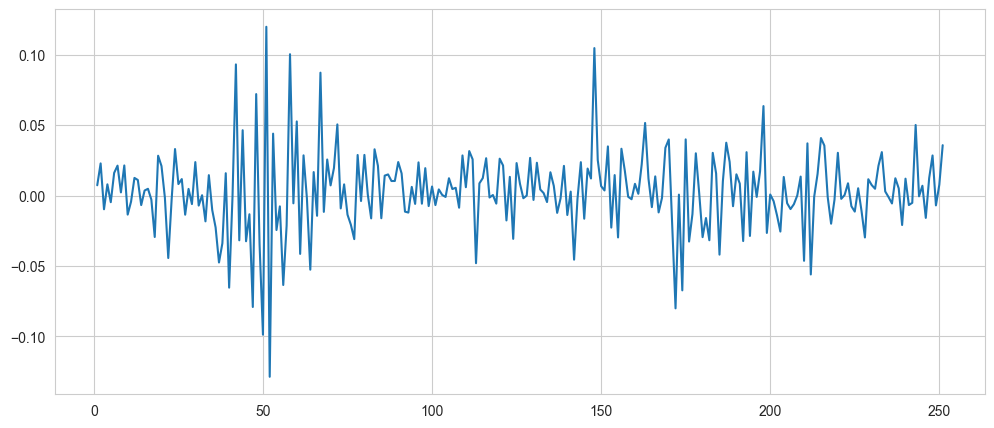

In [23]:
#Let us now plot the daily return
AAPL['Daily Return'].plot(figsize=(12,5))

In [24]:
all_stocks = pd.DataFrame( columns = ['Apple', 'Google', 'Microsoft'], index=AAPL["Date"]) 
all_stocks['Apple'] = AAPL["Adj Close"].values
all_stocks['Google'] = GOOG["Adj Close"].values
all_stocks['Microsoft'] = MSFT["Adj Close"].values
all_stocks.head()

,Apple,Google,Microsoft
Date,,,
12/30/2019,72.256,1336.140015,155.938049
12/31/2019,72.784,1337.020020,156.046890
1/2/2020,74.445,1367.369995,158.936279
1/3/2020,73.721,1360.660034,156.957260
1/6/2020,74.308,1394.209961,157.362961


<Axes: >

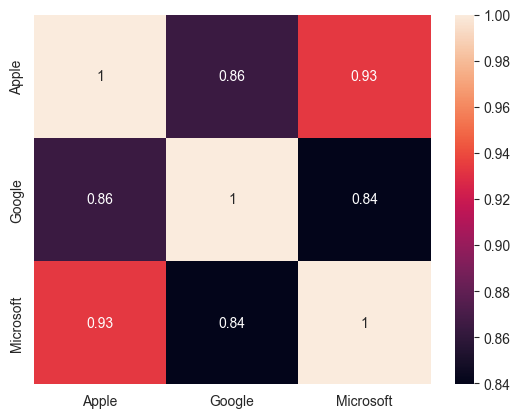

In [28]:
import numpy as np
corr = all_stocks.dropna().corr()

sns.heatmap(corr, annot=True,mask=False)

<Axes: xlabel='Date'>

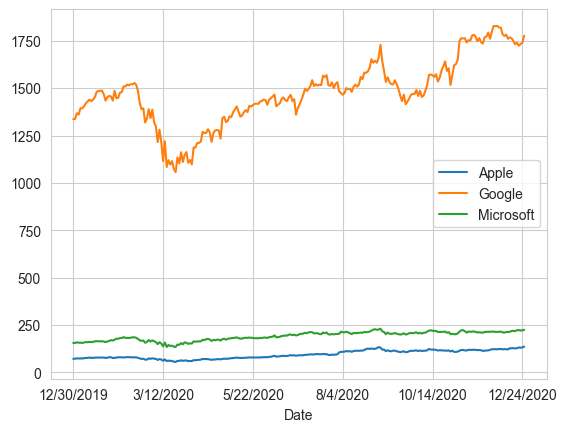

In [38]:
all_stocks.plot()